In [1]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('이상치제거.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,0,0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,1.0,0.9,20.0,36.0,27.0,3.0,1,0,0,0
2,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,1.0,1.1,29.0,34.0,18.0,1.0,1,0,0,0
3,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,1.0,0.8,19.0,12.0,25.0,1.0,1,0,0,0
4,6,1,50,41,165,55,75.0,1.2,1.5,1.0,...,3.0,0.8,29.0,40.0,37.0,3.0,0,0,0,0


# 남녀 따로 정규화

In [3]:
df_male = df.loc[df['성별코드']==1]
df_female = df.loc[df['성별코드']==2]

In [4]:
from sklearn.preprocessing import StandardScaler

Scalar_Index =['신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

scaler = StandardScaler()
scaler.fit(df_male[Scalar_Index])
df_male[Scalar_Index] = scaler.transform(df_male[Scalar_Index])



Scalar_Index =['신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']


scaler = StandardScaler()
scaler.fit(df_female[Scalar_Index])
df_female[Scalar_Index] = scaler.transform(df_female[Scalar_Index])

In [5]:
data = pd.concat([df_male,df_female],axis=0)
data[['연령대코드(5세단위)','청력(좌)','청력(우)','요단백','실명(좌)','실명(우)','음주여부','흡연상태','구강검진수검여부']] \
    = data[['연령대코드(5세단위)','청력(좌)','청력(우)','요단백','실명(좌)','실명(우)','음주여부','흡연상태','구강검진수검여부']].astype('category')


In [6]:
data.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '실명(좌)', '실명(우)'],
      dtype='object')

In [7]:

train_data = data[data['가입자일련번호']%5 != 0]
test_data = data[data['가입자일련번호']%5 == 0]

# Traindataa

X_train =  train_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '실명(좌)', '실명(우)']]

y_train = train_data[['연령대코드(5세단위)']]

#test_data
X_test =  test_data[[ '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '실명(좌)', '실명(우)']]

y_test = test_data[['연령대코드(5세단위)']]


y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159023 entries, 3 to 794471
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   연령대코드(5세단위)  159023 non-null  category
dtypes: category(1)
memory usage: 1.4 MB


Feature ranking:
1. feature 허리둘레 (0.066)
2. feature 트리글리세라이드 (0.065)
3. feature 혈색소 (0.064)
4. feature 식전혈당(공복혈당) (0.063)
5. feature LDL콜레스테롤 (0.063)
6. feature 총콜레스테롤 (0.062)
7. feature 수축기혈압 (0.062)
8. feature HDL콜레스테롤 (0.059)
9. feature (혈청지오티)AST (0.058)
10. feature (혈청지오티)ALT (0.057)
11. feature 감마지티피 (0.057)
12. feature 이완기혈압 (0.055)
13. feature 신장(5Cm단위) (0.050)
14. feature 시력(좌) (0.046)
15. feature 시력(우) (0.046)
16. feature 혈청크레아티닌 (0.040)
17. feature 체중(5Kg단위) (0.040)
18. feature 흡연상태 (0.014)
19. feature 음주여부 (0.012)
20. feature 구강검진수검여부 (0.012)
21. feature 요단백 (0.005)
22. feature 청력(좌) (0.003)
23. feature 청력(우) (0.003)
24. feature 실명(우) (0.000)
25. feature 실명(좌) (0.000)


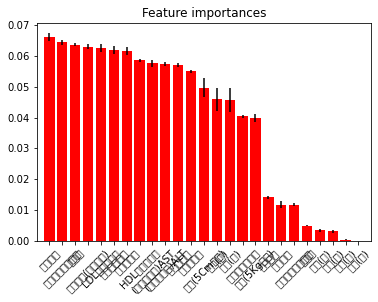

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X = X_train, y = y_train)
y_pred = model.predict(X_test)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [9]:
y_true = y_test
y_true = pd.DataFrame(y_true)
y_pred = pd.DataFrame(y_pred)
y_true.reset_index(inplace = True)

In [10]:
result = pd.concat([y_true,y_pred],axis=1)
result.columns = ['index','true','pred']
result

,index,true,pred
0,3,50,50
1,16,60,50
2,30,30,40
3,47,40,30
4,66,50,50
...,...,...,...
159018,794451,50,50
159019,794458,50,40
159020,794462,50,60
159021,794466,60,50


In [11]:
age_result = result[['true','pred']]
from sklearn.metrics import accuracy_score
print('정확도 :', round(accuracy_score(result['true'],result['pred']),4))

정확도 : 0.4109


Text(0.5, 1.0, '20')

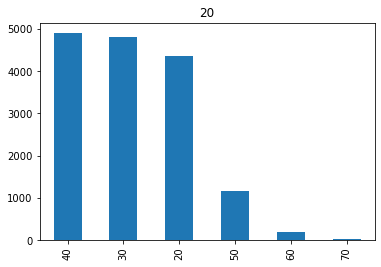

In [12]:
result_20 = result.loc[result['true']==20]
result_20['pred'].value_counts().plot(kind = 'bar')
plt.title(20)

Text(0.5, 1.0, '30')

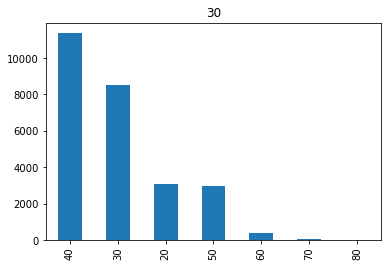

In [13]:
result_30 = result.loc[result['true']==30]
result_30['pred'].value_counts().plot(kind = 'bar')
plt.title(30)

Text(0.5, 1.0, '40')

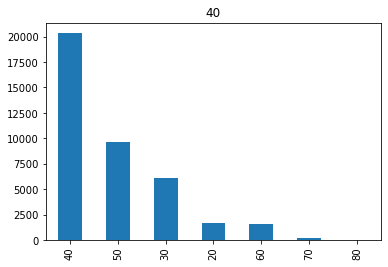

In [14]:
result_40 = result.loc[result['true']==40]
result_40['pred'].value_counts().plot(kind = 'bar')
plt.title(40)

Text(0.5, 1.0, '50')

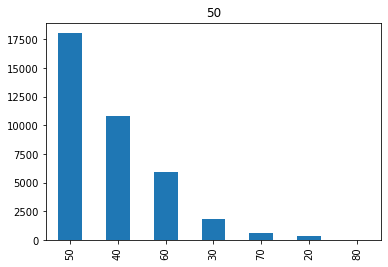

In [15]:
result_50 = result.loc[result['true']==50]
result_50['pred'].value_counts().plot(kind = 'bar')
plt.title(50)

Text(0.5, 1.0, '60')

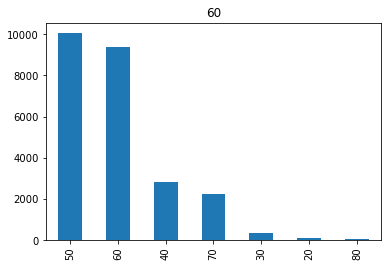

In [16]:
result_60 = result.loc[result['true']==60]
result_60['pred'].value_counts().plot(kind = 'bar')
plt.title(60)

Text(0.5, 1.0, '70')

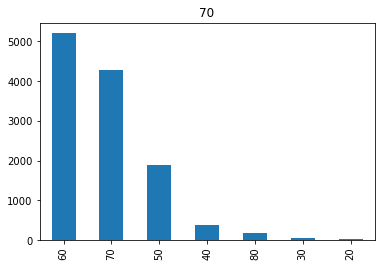

In [17]:
result_70 = result.loc[result['true']==70]
result_70['pred'].value_counts().plot(kind = 'bar')
plt.title(70)

Text(0.5, 1.0, '80')

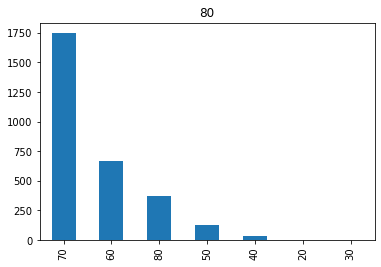

In [18]:
result_80 = result.loc[result['true']==80]
result_80['pred'].value_counts().plot(kind = 'bar')
plt.title(80)

Feature ranking:
1. feature 허리둘레 (0.066)
2. feature 트리글리세라이드 (0.065)
3. feature 혈색소 (0.064)
4. feature 식전혈당(공복혈당) (0.063)
5. feature LDL콜레스테롤 (0.063)
6. feature 총콜레스테롤 (0.062)
7. feature 수축기혈압 (0.062)
8. feature HDL콜레스테롤 (0.059)
9. feature (혈청지오티)AST (0.058)
10. feature (혈청지오티)ALT (0.057)
11. feature 감마지티피 (0.057)
12. feature 이완기혈압 (0.055)
13. feature 신장(5Cm단위) (0.050)
14. feature 시력(좌) (0.046)
15. feature 시력(우) (0.046)
16. feature 혈청크레아티닌 (0.040)
17. feature 체중(5Kg단위) (0.040)
18. feature 흡연상태 (0.014)
19. feature 음주여부 (0.012)
20. feature 구강검진수검여부 (0.012)
21. feature 요단백 (0.005)
22. feature 청력(좌) (0.003)
23. feature 청력(우) (0.003)
24. feature 실명(우) (0.000)
25. feature 실명(좌) (0.000)


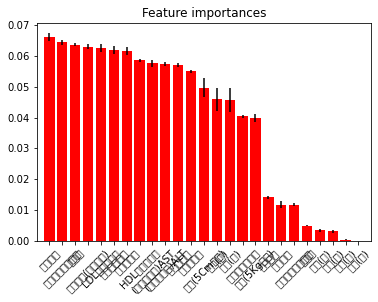

In [19]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()